In [1]:
import pandas as pd
from google_play_scraper import reviews, Sort
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

## 데이터 수집
### 구글 playstore 리뷰 데이터

In [2]:
def gstore_reviews(app_id):
    # 리뷰 가져오기
    result = reviews(
        app_id,
        lang="ko", # 한국어 리뷰
        country="kr", # 한국
        sort=Sort.NEWEST, # 최신 리뷰 먼저 가져오기
        count=100000, # 가져올 리뷰 수 (최대 100,000)
    )

    # 리뷰 데이터
    review_data = result[0]

    # DataFrame으로 변환
    return pd.DataFrame(review_data)

In [3]:
# duo_df = gstore_reviews("com.duolingo")
# duo_df.to_csv("duo_rv.csv", index=False, encoding="utf-8")

qz_df = gstore_reviews("com.quizlet.quizletandroid")
# qz_df.to_csv("qz_rv.csv", index=False, encoding="utf-8")

# cc_df = gstore_reviews("classcard.net")
# cc_df.to_csv("cc_rv.csv", index=False, encoding="utf-8")

# qd_df = gstore_reviews("com.mathpresso.qanda")
# qd_df.to_csv("qd_rv.csv", index=False, encoding="utf-8")

In [4]:
# 퀴즈렛
# df = pd.read_csv("qz_rv.csv")  # 실제 파일명으로 변경 필요

# 날짜 컬럼을 datetime 형식으로 변환
# df["at"] = pd.to_datetime(df["at"])

# 2025년 이후 데이터만 필터링
# df_filtered = df[df["at"].dt.year >= 2025]
# df_filtered.to_csv("qz_rv_2025.csv", index=False, encoding="utf-8")

### Quizlet의 학습용, 교구용 비율 분석 - 사용자 리뷰 기반

In [5]:
# 학습용 분류 키워드 설정
study_keywords = [
    "시험",
    "문제",
    "단어",
    "개념",
    "복습",
    "암기",
    "테스트",
    "학습",
    "공부",
    "연습",
]

# 교구용 분류 키워드 설정
teaching_keywords = [
    "수업",
    "퀴즈",
    "교사용",
    "학습지",
    "학생",
    "수업자료",
    "활동",
    "플래시카드",
]

def categorize_content(text):
    if isinstance(text, str):  # 문자열 인지 확인
        if any(word in text for word in study_keywords):
            return "학습용"
        elif any(word in text for word in teaching_keywords):
            return "교구용"
    return "기타"

# category 컬럼 추가, values = "학습용", "교구용", "기타"
qz_df["category"] = qz_df["content"].apply(categorize_content)

# 카테고리 별 비율 계산
category_counts = qz_df["category"].value_counts(normalize=True) * 100
category_counts

category
기타     61.024684
학습용    38.207841
교구용     0.767476
Name: proportion, dtype: float64

### 유료 요금제 관련 리뷰 분석

In [6]:
# 유료 요금 관련 리뷰 키워드 설정
plus_keywords = [
    "유료",
    "플러스",
    "돈",
    "plus",
]

# 함수 정의
def paid_plan_content(text):
    if isinstance(text, str):  # 문자열인지 확인
        if any(word in text for word in plus_keywords):
            return True  # 키워드 포함된 경우 True 반환
    return False  # 키워드 미포함 시 False 반환

# 필터링 된 리뷰만 저장
result_df = qz_df[qz_df["content"].apply(paid_plan_content)][
    ["userName", "content", "score"]
].reset_index(drop=True)

# result_df.to_csv("plus_rv.csv", index=False, encoding="utf-16", header=False)
result_df

,userName,content,score
0,김도형,기능은 좋은 데 주변에 같이 하고있는 친구들은 유료 결제를 안해도 테스트가 여러번 ...,2
1,이승준,유료인게 쫌 아쉽지만 학습에는 퀴즈렛 만한기 없다,5
2,메로나,유료ㅜ,4
3,임윤서,퀴즐렛 플러스를 결제했는데 낱말카드에 이미지를 저장하려고 하면 계속 로그아웃이 되고...,3
4,kk k,유료결제 취소를 원해요,1
...,...,...,...
226,Google 사용자,무료지만 유료같은 어플,5
227,Google 사용자,와..ㅋㅋ 너무 좋네요. 유료여도 돈내고 다운받고싶을 정도로 훌륭한 앱입니다👍 디자...,5
228,Google 사용자,구성도 좋고 테스트도 다양해서 좋네요. 유료로 업그레이드 할 의향도 든다는 ㅎㅎ,5
229,Google 사용자,영어 뿐만이 아니라 제가 등록한 모든 단어의 발음지원이 된다는 사실에 놀랐네요. 깔...,5


### 문서 스캔 기능 관련 리뷰

In [7]:
# 문서 스캔 기능 관련 리뷰 분석
scan_keywords = [
    "스캔",
    "인식",
]

# 함수 정의
def scan_content(text):
    if isinstance(text, str):  # 문자열인지 확인
        if any(word in text for word in scan_keywords):
            return True  # 키워드 포함된 경우 True 반환
    return False  # 키워드 미포함 시 False 반환

# 스캔 관련 리뷰 필터링
filtered_df = qz_df[qz_df["content"].apply(scan_content)][
    ["userName", "content", "score"]
].reset_index(drop=True)

filtered_df

,userName,content,score
0,O,유료기능 솔직히 값어치 못함 그리고 자잘한 버그가 너무 많음 스캔오류가 너무 많이뜸...,2
1,황인태,"폴더안에 단어장 사라지는 버그는 고쳐진거 같아서 좋습니다. 근데, 폴더 안에서 단어...",3
2,ᄋᄉᄋ,돈내고 쓰는건데 제발 문서 스캔 인식 좀...,2
3,엘리,터치가 잘 안 됩니다. 단어 카드를 뒤집을 때 뒤집기가 아니라 카드 넘기는 모션으로...,1
4,전형우,업데이트 하니까 화면전환이 느려터져짐. 제일 중요한건 단어 뜻을 작성하려고 클릭해도...,2
5,이크에크,문서스캔 기능 구림. 차라리 웹사이트에 사진 넣고 돌리는게 더 나을 듯. 돈 아까운...,1
6,안수린,단어를 외우고 학습하기 좋은 앱이에요 💯 단어를 적을때 사진을 찍어 인식하는 그런 ...,4
7,김다온,이럴거면 그냥 유료어플로 하지 왜 무료다운받을 수 있고 이용하는데는 유료인가요......,1
8,안효은,완벽했던 앱이 왜 이렇게 쇠퇴했는지 모르겠습니다. 단어를 외울 때도 수행평가를 준비...,1
9,Chloe KIM,플러스 가입을 했는데 학습세트만들기에서 문서스캔하기가 안보입니다,5


### 워드클라우드 생성

In [8]:
from konlpy.tag import Okt
from wordcloud import WordCloud
from stopwords import get_stopwords
from collections import Counter

def get_WordCloud(df, title):
    okt = Okt()

    # 한국어 불용어
    korean_stopwords = set(get_stopwords(language="korean"))
    custom_stopwords = {
        "이",
        "그",
        "저",
        "것",
        "나",
        "너",
        "우리",
        "저희",
        "그들",
        "그녀",
        "입니다",
        "하",
        "이것",
        "저것",
        "다",
        "되다",
        "하다",
        "있다",
        "없다",
        "과",
        "도",
        "의",
        "는",
        "은",
        "를",
        "이",
        "가",
        "에서",
        "에",
        "을",
        "아주",
        "진짜",
        "정말",
        "가장",
        "너무",
        "정말로",
        "대해",
        "대하여",
        "이건",
        "모든",
        "저건",
        "통해",
        "제발",
        "자꾸",
        "계속",
        "이후",
        "부분",
        "완전",
        "그냥",
        "걍",
        "이면",
        "때문",
        "내지",
        "해도",
        "달이",
    }
    total_stopwords = korean_stopwords.union(custom_stopwords)

    combined_text = " ".join(df["content"].astype(str))

    tokens_ko = okt.nouns(combined_text)

    filtered_tokens = [
        word for word in tokens_ko if word not in total_stopwords and len(word) > 1
    ]

    word_freq = Counter(filtered_tokens)

    top_words = word_freq.most_common(80)
    #     print("상위 50개 단어:", top_100_words)  # 상위 50개 단어 출력
    # bubble_mask = np.array(Image.open('./img/YoonseokChoi.jpg'))
    wordcloud = WordCloud(
        font_path="C://Windows/Fonts/malgun.ttf",  # Windows 한글 폰트 경로
        width=300,
        height=150,
        background_color="black",  # 배경색
        colormap="Pastel1",  # 색상 맵 (색상 팔레트)
        #         max_font_size=200,  # 최대 폰트 크기
        #         min_font_size=10,  # 최소 폰트 크기
        max_words=80,  # 최대 단어 수
        #         contour_color='black',  # 단어 클라우드 외곽선 색상
        #         contour_width=1,  # 외곽선 두께
        #         random_state=42,  # 결과 일관성 유지
        # mask = bubble_mask
    ).generate_from_frequencies(dict(top_words))

    # 워드 클라우드 출력
    plt.figure(figsize=(10, 10))
    plt.title(title, fontsize=18, fontweight="bold", loc="left")
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

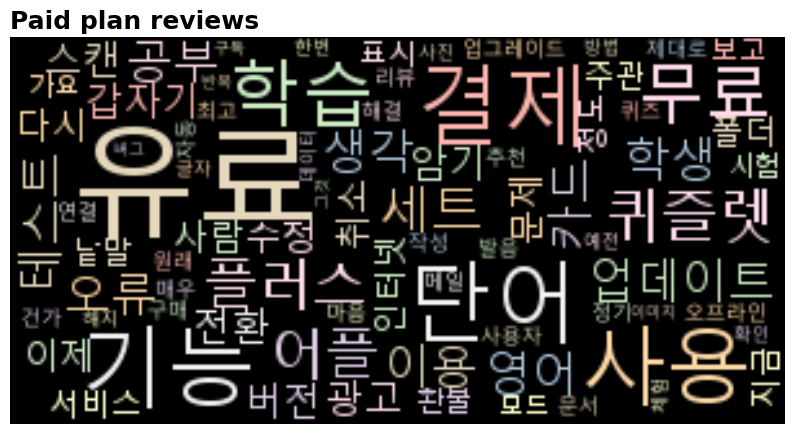

In [9]:
get_WordCloud(result_df, "Paid plan reviews")